# Họ và Tên : Lê Văn Quốc Việt
# MSSV: 2174802010907

### Câu 1 (2 điểm): Cho một ảnh bất kỳ (tên ảnh do sinh viên tự đặt, ví dụ: `my_image.jpg`) và thực hiện các yêu cầu sau:

* Viết chương trình sử dụng median filter để làm mịn ảnh. (0.5 điểm)  
* Viết chương trình sử dụng Sobel filter để xác định biên của hình ảnh. (0.5 điểm)  
* Đổi màu ảnh bằng cách hoán đổi thứ tự các kênh màu (ví dụ: BGR → GRB hoặc GBR...) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)  
* Chuyển ảnh sang không gian màu LAB và tách riêng 3 kênh L, A, B, lưu thành ảnh grayscale tương ứng (`[ten_anh]_L.jpg`, `[ten_anh]_A.jpg`, `[ten_anh]_B.jpg`). (0.5 điểm)


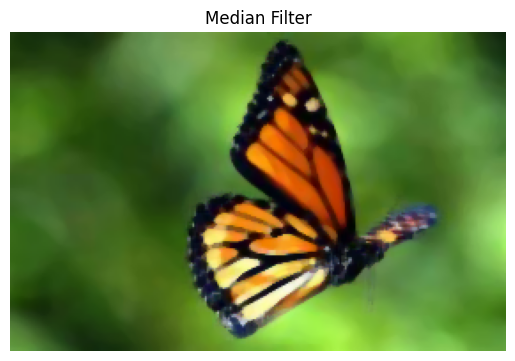

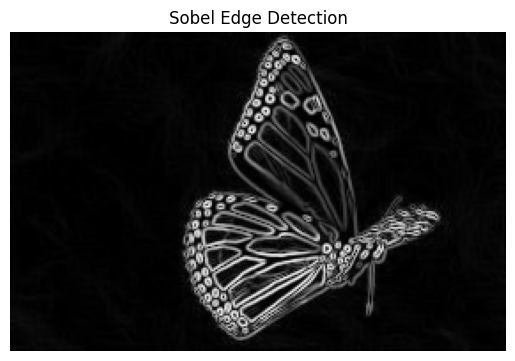

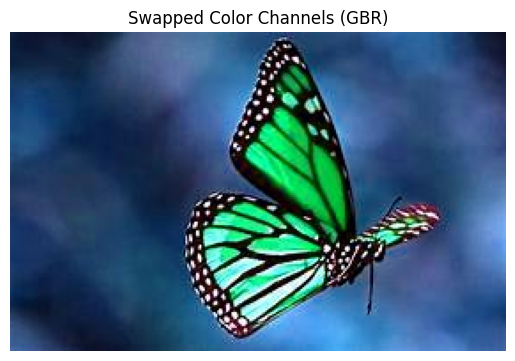

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'my_image.jpg'
img = cv2.imread(image_path)

if img is None:
    raise FileNotFoundError(f"Không tìm thấy file '{image_path}'")

def show_img(img, title='Image', is_gray=False):
    if is_gray:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

median_filtered = cv2.medianBlur(img, 5)
show_img(median_filtered, 'Median Filter')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)
sobel = np.uint8(np.clip(sobel / np.max(sobel) * 255, 0, 255))
show_img(sobel, 'Sobel Edge Detection', is_gray=True)

swapped = img[:, :, [1, 2, 0]]  # G, R, B
swapped_filename = image_path.split('.')[0] + '_swapped.jpg'
cv2.imwrite(swapped_filename, swapped)
show_img(swapped, 'Swapped Color Channels (GBR)')

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L, A, B = cv2.split(lab)

cv2.imwrite("my_image_L.jpg", L)
cv2.imwrite("my_image_A.jpg", A)
cv2.imwrite("my_image_B.jpg", B)

### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật lọc và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Gaussian Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Median Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Bilateral Filter (tham số ngẫu nhiên) (0.5 điểm)  
* Canny Edge Detection (thresholds ngẫu nhiên 50–150) (0.5 điểm)  
* Erosion (kernel 2x2 đến 5x5 ngẫu nhiên) (0.5 điểm)  
* Dilation (tương tự Erosion) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* B: Gaussian Blur  
* M: Median Blur  
* F: Bilateral Filter  
* E: Canny Edge  
* R: Erosion  
* D: Dilation (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_blur_dog.jpg`, `result_canny_image2.jpg` (0.5 điểm)


Chọn phím để áp dụng xử lý:
B: Gaussian Blur | M: Median Blur | F: Bilateral Filter
E: Canny Edge | R: Erosion | D: Dilation
Q: Thoát chương trình
Đang áp dụng: BLUR
Gaussian Blur với kernel: 3x3


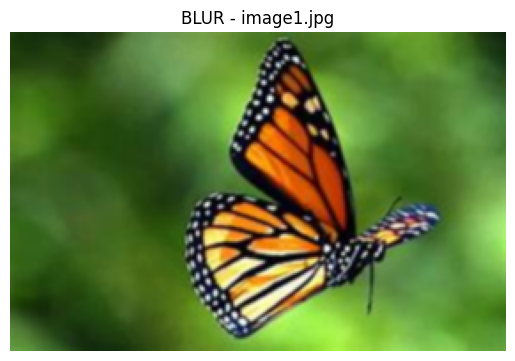

Gaussian Blur với kernel: 3x3


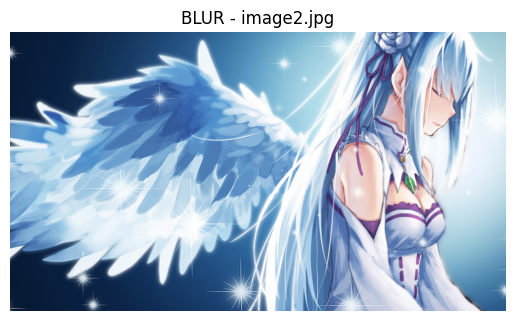

Gaussian Blur với kernel: 7x7


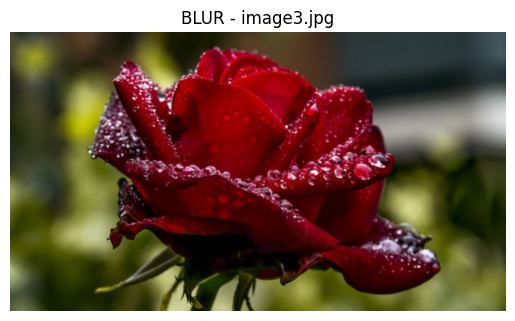

Đang áp dụng: MEDIAN
Median Blur với kernel: 9


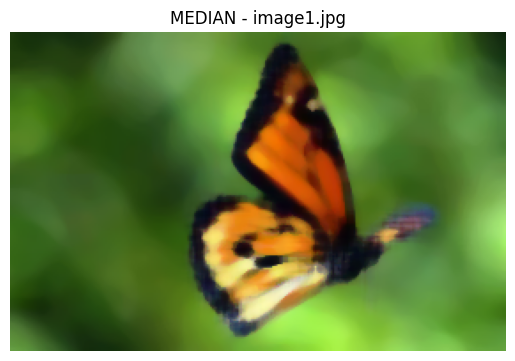

Median Blur với kernel: 7


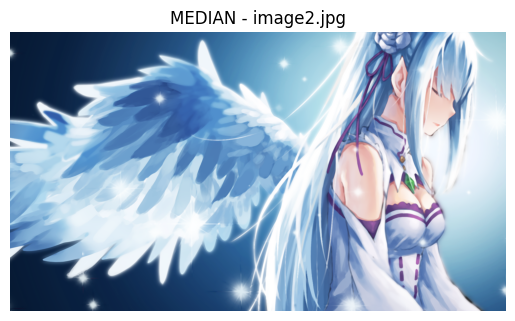

Median Blur với kernel: 11


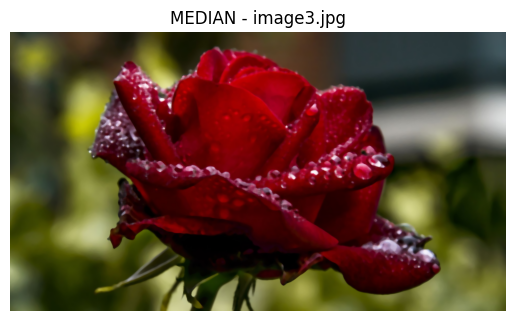

Đang áp dụng: BILATERAL
Bilateral Filter d=12, sigmaColor=88, sigmaSpace=132


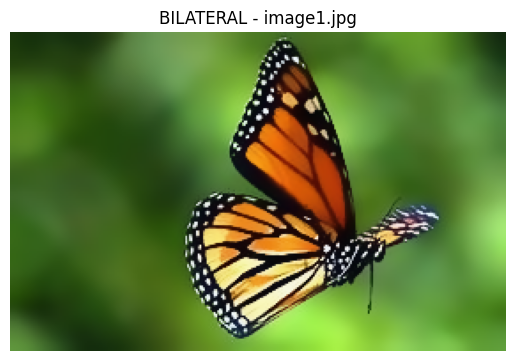

Bilateral Filter d=15, sigmaColor=142, sigmaSpace=52


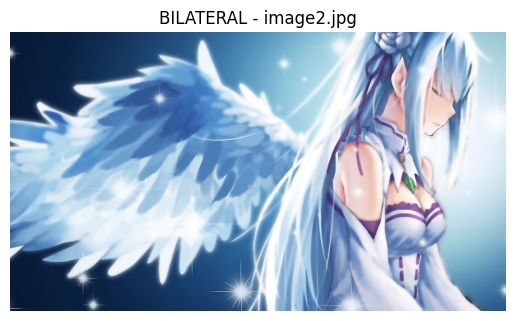

Bilateral Filter d=11, sigmaColor=64, sigmaSpace=128


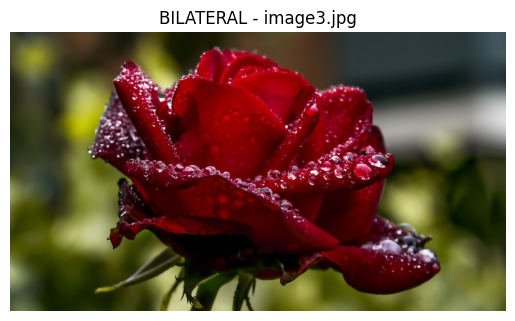

Đang áp dụng: CANNY
Canny Edge với threshold1=65, threshold2=148


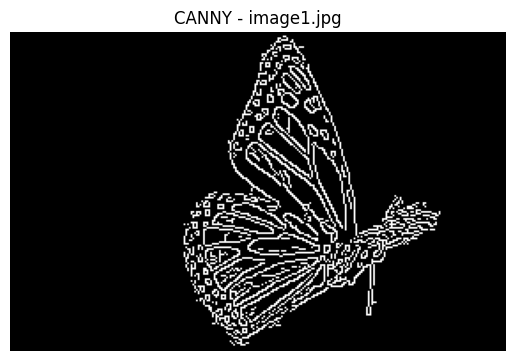

Canny Edge với threshold1=67, threshold2=104


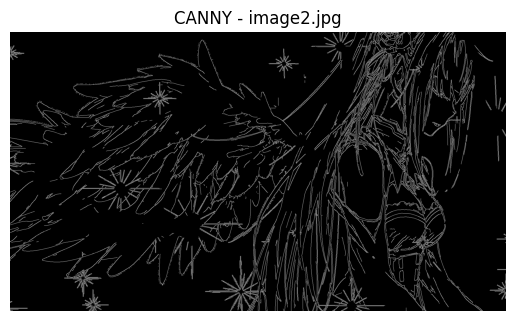

Canny Edge với threshold1=92, threshold2=138


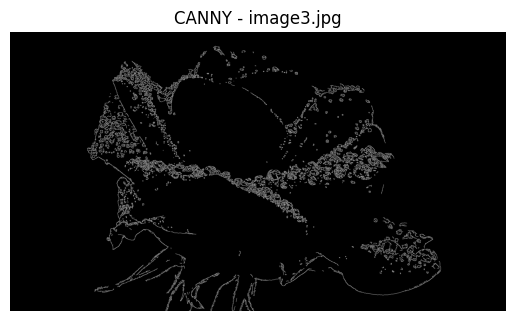

Đang áp dụng: EROSION
Erosion kernel: 3x3


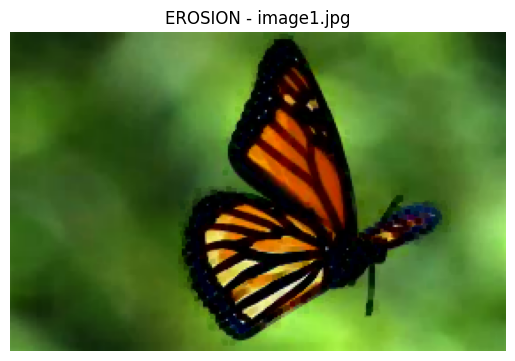

Erosion kernel: 4x4


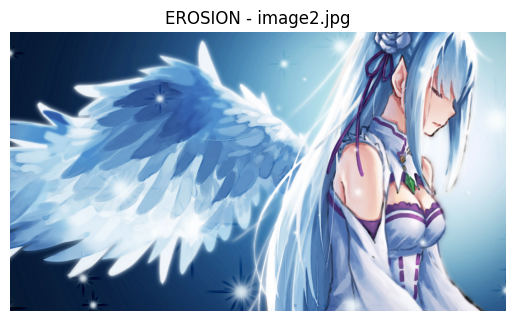

Erosion kernel: 4x4


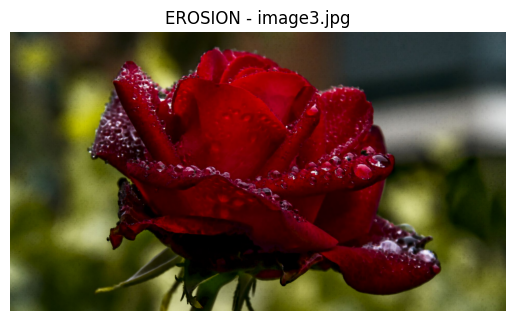

Đang áp dụng: DILATION
Dilation kernel: 4x4


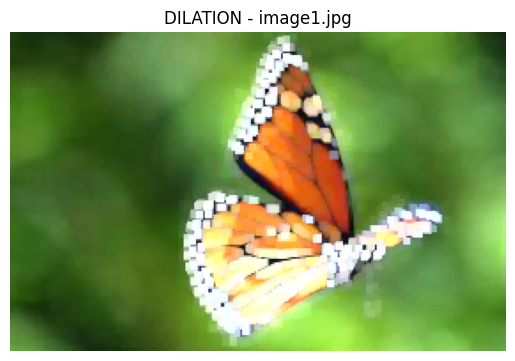

Dilation kernel: 5x5


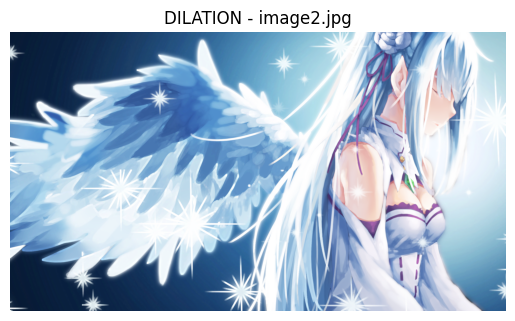

Dilation kernel: 2x2


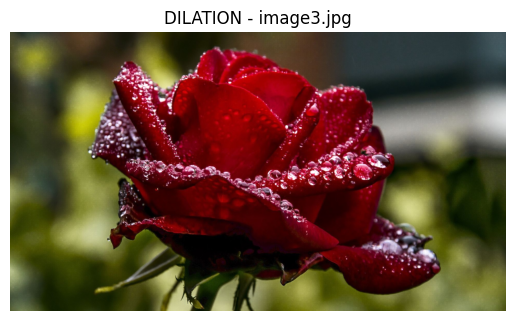

Kết thúc chương trình.


In [2]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import os

image_paths = ['image1.jpg', 'image2.jpg', 'image3.jpg']  
images = []

for path in image_paths:
    img = cv2.imread(path)
    if img is None:
        print(f"Không tìm thấy ảnh: {path}")
        exit()
    images.append(img)

def show_img(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def gaussian_blur(img):
    k = random.choice([3, 5, 7, 9, 11])
    print(f"Gaussian Blur với kernel: {k}x{k}")
    return cv2.GaussianBlur(img, (k, k), 0)

def median_blur(img):
    k = random.choice([3, 5, 7, 9, 11])
    print(f"Median Blur với kernel: {k}")
    return cv2.medianBlur(img, k)

def bilateral_filter(img):
    d = random.randint(5, 15)
    sigmaColor = random.randint(50, 150)
    sigmaSpace = random.randint(50, 150)
    print(f"Bilateral Filter d={d}, sigmaColor={sigmaColor}, sigmaSpace={sigmaSpace}")
    return cv2.bilateralFilter(img, d, sigmaColor, sigmaSpace)

def canny_edge(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    t1 = random.randint(50, 100)
    t2 = random.randint(100, 150)
    print(f"Canny Edge với threshold1={t1}, threshold2={t2}")
    edges = cv2.Canny(gray, t1, t2)
    return cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)  # để hiển thị màu

def erosion(img):
    k = random.choice([2, 3, 4, 5])
    kernel = np.ones((k, k), np.uint8)
    print(f"Erosion kernel: {k}x{k}")
    return cv2.erode(img, kernel, iterations=1)

def dilation(img):
    k = random.choice([2, 3, 4, 5])
    kernel = np.ones((k, k), np.uint8)
    print(f"Dilation kernel: {k}x{k}")
    return cv2.dilate(img, kernel, iterations=1)

operations = {
    'B': ('blur', gaussian_blur),
    'M': ('median', median_blur),
    'F': ('bilateral', bilateral_filter),
    'E': ('canny', canny_edge),
    'R': ('erosion', erosion),
    'D': ('dilation', dilation)
}

print("Chọn phím để áp dụng xử lý:")
print("B: Gaussian Blur | M: Median Blur | F: Bilateral Filter")
print("E: Canny Edge | R: Erosion | D: Dilation")
print("Q: Thoát chương trình")

while True:
    key = input("Nhập phím (B/M/F/E/R/D hoặc Q để thoát): ").upper()
    if key == 'Q':
        print("Kết thúc chương trình.")
        break

    if key in operations:
        op_name, func = operations[key]
        print(f"Đang áp dụng: {op_name.upper()}")

        for idx, img in enumerate(images):
            result = func(img)
            image_name = os.path.basename(image_paths[idx])
            filename = f"result_{op_name}_{image_name}"
            cv2.imwrite(filename, result)
            show_img(result, f"{op_name.upper()} - {image_name}")
    else:
        print("10đ rồi đấy!")


### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Tăng kích thước ảnh đầu tiên thêm 35 pixel ở mỗi cạnh. (0.5 điểm)  
* Xoay ảnh thứ hai 135 độ và lật ngang. (0.5 điểm)  
* Tăng kích thước ảnh thứ ba lên 5 lần và làm mịn bằng Gaussian blur kernel 9x9. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba bằng công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.5, 2.0], \quad \beta \in [-50, 50]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


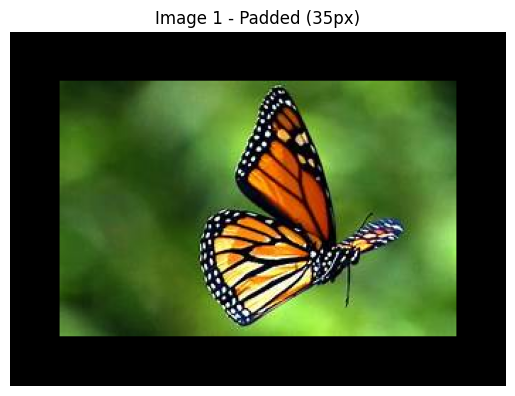

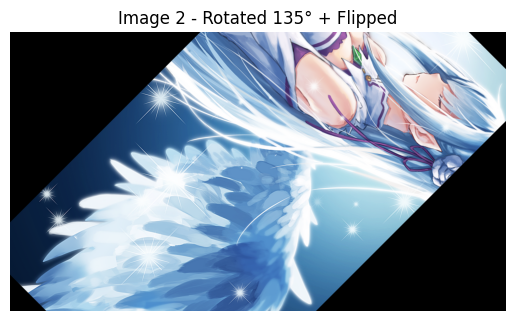

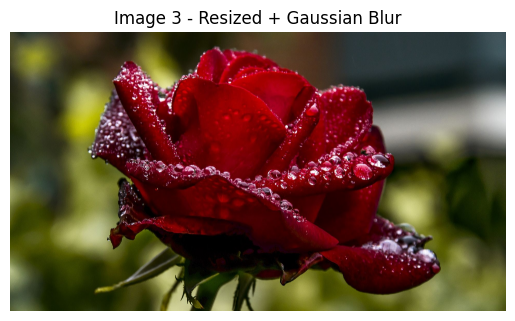

Thay đổi độ sáng và tương phản với alpha = 1.96, beta = -48


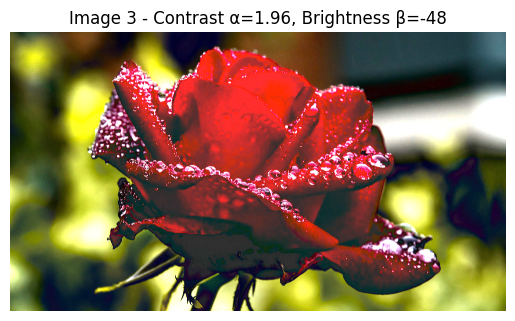

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random


img1 = cv2.imread('image1.jpg') 
img2 = cv2.imread('image2.jpg')
img3 = cv2.imread('image3.jpg')

if img1 is None or img2 is None or img3 is None:
    raise FileNotFoundError("Một trong các ảnh không tồn tại. Kiểm tra lại tên tệp.")


def show_img(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

top, bottom, left, right = 35, 35, 35, 35
resized_img1 = cv2.copyMakeBorder(img1, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 0))
cv2.imwrite('output_image1_padded.jpg', resized_img1)
show_img(resized_img1, 'Image 1 - Padded (35px)')

(h2, w2) = img2.shape[:2]
center = (w2 // 2, h2 // 2)
rotate_matrix = cv2.getRotationMatrix2D(center, 135, 1.0)
rotated_img2 = cv2.warpAffine(img2, rotate_matrix, (w2, h2))
flipped_img2 = cv2.flip(rotated_img2, 1)
cv2.imwrite('output_image2_rotated_flipped.jpg', flipped_img2)
show_img(flipped_img2, 'Image 2 - Rotated 135° + Flipped')

resized_img3 = cv2.resize(img3, None, fx=5.0, fy=5.0, interpolation=cv2.INTER_LINEAR)

blurred_img3 = cv2.GaussianBlur(resized_img3, (9, 9), 0)
cv2.imwrite('output_image3_blurred.jpg', blurred_img3)
show_img(blurred_img3, 'Image 3 - Resized + Gaussian Blur')

alpha = round(random.uniform(0.5, 2.0), 2)  
beta = random.randint(-50, 50)              

print(f"Thay đổi độ sáng và tương phản với alpha = {alpha}, beta = {beta}")

transformed_img3 = cv2.convertScaleAbs(resized_img3, alpha=alpha, beta=beta)
cv2.imwrite('output_image3_transformed.jpg', transformed_img3)
show_img(transformed_img3, f'Image 3 - Contrast α={alpha}, Brightness β={beta}')


# Chúc các bạn làm bài may mắn, hi vọng mọi người qua môn tất cả được 10.